<a href="https://colab.research.google.com/github/arunprasath2007/FrameworkILoveAndToExperiment/blob/master/fastai_petbreeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 10.1MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 1.0MB 47.3MB/s 
     |████████████████████████████████| 194kB 48.1MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 40kB 6.2MB/s 
     |████████████████████████████████| 92kB 11.5MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 2.7MB 46.1MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [4]:

from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)


Path('/root/.fastai/data/oxford-iiit-pet')

In [5]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [6]:
Path.BASE_PATH = path

In [7]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [14]:
(path/'images').ls()

(#7393) [Path('images/pug_115.jpg'),Path('images/japanese_chin_22.jpg'),Path('images/leonberger_16.jpg'),Path('images/german_shorthaired_109.jpg'),Path('images/basset_hound_114.jpg'),Path('images/miniature_pinscher_154.jpg'),Path('images/havanese_63.jpg'),Path('images/german_shorthaired_166.jpg'),Path('images/Sphynx_92.jpg'),Path('images/newfoundland_84.jpg')...]

In [15]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=35),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75)
                 )

dls = pets.dataloaders(path/'images')

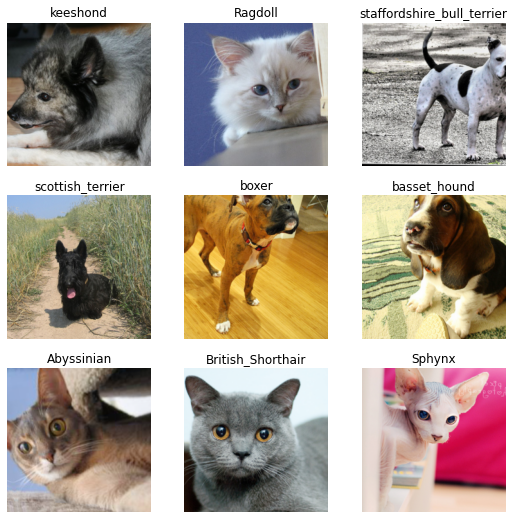

In [16]:
dls.show_batch()

In [17]:
learn.fine_tune??

Object `learn.fine_tune` not found.


In [18]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [19]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.588315,0.419197,0.138024,01:08


epoch,train_loss,valid_loss,error_rate,time
0,0.515520,0.307058,0.106225,01:11
1,0.406069,0.270684,0.092016,01:11
2,0.287066,0.259518,0.087957,01:11


SuggestedLRs(lr_min=2.0892961401841602e-06, lr_steep=1.3182567499825382e-06)

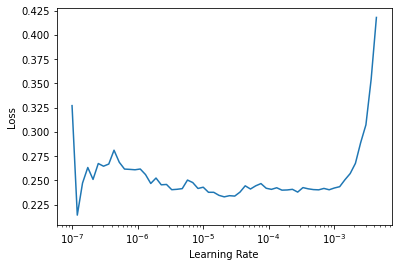

In [21]:
learn.lr_find()

In [23]:
learn.recorder.summary()

Sequential (Input shape: ['64 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 112 x 112  9,408      True      
________________________________________________________________
BatchNorm2d          64 x 64 x 112 x 112  128        True      
________________________________________________________________
ReLU                 64 x 64 x 112 x 112  0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 56 x 56    0          False     
________________________________________________________________
Conv2d               64 x 64 x 56 x 56    36,864     True      
________________________________________________________________
BatchNorm2d          64 x 64 x 56 x 56    128        True      
________________________________________________________________
ReLU                 64 x 64 x 56 x 56    0          False     
_________________________________________________

In [24]:
learn.fine_tune(1, base_lr=5e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.223340,0.256023,0.089310,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.209186,0.254135,0.086604,01:09


In [25]:
learn.show_training_loop()

Start Fit
   - before_fit     : [TrainEvalCallback, Recorder, ProgressCallback]
  Start Epoch Loop
     - before_epoch   : [Recorder, ProgressCallback]
    Start Train
       - before_train   : [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - before_batch   : []
         - after_pred     : []
         - after_loss     : []
         - before_backward: []
         - after_backward : []
         - after_step     : []
         - after_cancel_batch: []
         - after_batch    : [TrainEvalCallback, Recorder, ProgressCallback]
      End Batch Loop
    End Train
     - after_cancel_train: [Recorder]
     - after_train    : [Recorder, ProgressCallback]
    Start Valid
       - before_validate: [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - **CBs same as train batch**: []
      End Batch Loop
    End Valid
     - after_cancel_validate: [Recorder]
     - after_validate : [Recorder, ProgressCallback]
  End Epoch Loop
   - after_

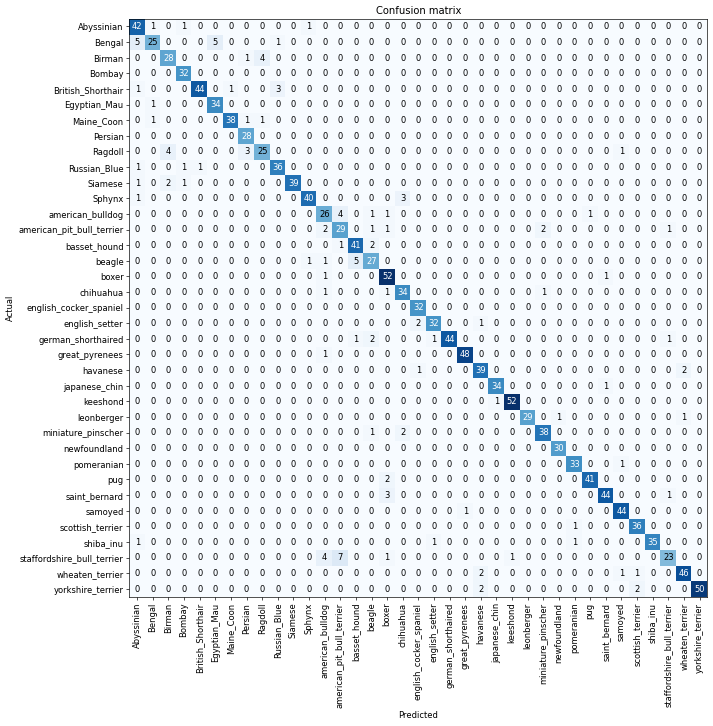

In [27]:
interp = ClassificationInterpretation.from_learner(learn=learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [28]:
interp.most_confused(min_val=5)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('Bengal', 'Abyssinian', 5),
 ('Bengal', 'Egyptian_Mau', 5),
 ('beagle', 'basset_hound', 5)]

In [29]:
interp.print_classification_report()

                            precision    recall  f1-score   support

                Abyssinian       0.81      0.93      0.87        45
                    Bengal       0.89      0.69      0.78        36
                    Birman       0.82      0.85      0.84        33
                    Bombay       0.91      1.00      0.96        32
         British_Shorthair       0.98      0.90      0.94        49
              Egyptian_Mau       0.87      0.97      0.92        35
                Maine_Coon       0.97      0.93      0.95        41
                   Persian       0.85      1.00      0.92        28
                   Ragdoll       0.83      0.76      0.79        33
              Russian_Blue       0.90      0.92      0.91        39
                   Siamese       1.00      0.91      0.95        43
                    Sphynx       0.95      0.91      0.93        44
          american_bulldog       0.72      0.79      0.75        33
 american_pit_bull_terrier       0.71      0.81

In [30]:
interp.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

SuggestedLRs(lr_min=6.918309736647643e-07, lr_steep=1.0964781722577754e-06)

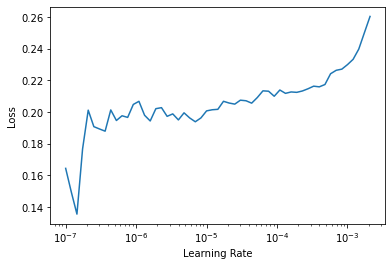

In [31]:
learn.lr_find()

In [32]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

learn.fit_one_cycle(3, 3e-3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.138281,0.334288,0.105548,01:13
1,0.521992,0.251555,0.075101,01:11
2,0.333448,0.237503,0.073072,01:10


In [33]:
learn.unfreeze()

SuggestedLRs(lr_min=1.58489319801447e-07, lr_steep=6.309573450380412e-07)

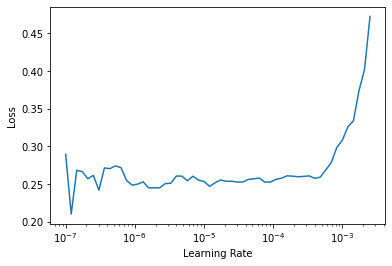

In [34]:
learn.lr_find()

In [35]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.251088,0.227026,0.070365,01:16
1,0.236164,0.228190,0.069689,01:14
2,0.227757,0.213531,0.066982,01:14
3,0.203296,0.210991,0.066306,01:13
4,0.183149,0.209852,0.066982,01:12
5,0.180167,0.211906,0.066982,01:13


In [36]:
learn.summary()

Sequential (Input shape: ['64 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 112 x 112  9,408      True      
________________________________________________________________
BatchNorm2d          64 x 64 x 112 x 112  128        True      
________________________________________________________________
ReLU                 64 x 64 x 112 x 112  0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 56 x 56    0          False     
________________________________________________________________
Conv2d               64 x 64 x 56 x 56    36,864     True      
________________________________________________________________
BatchNorm2d          64 x 64 x 56 x 56    128        True      
________________________________________________________________
ReLU                 64 x 64 x 56 x 56    0          False     
_________________________________________________

In [40]:

from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,2.655570,0.629717,0.185386,01:07
1,0.944909,0.350007,0.104195,01:06
2,0.539281,0.322652,0.098782,01:06


KeyboardInterrupt: ignored

In [41]:
learn = cnn_learner(dls, resnet152, metrics=error_rate).to_fp16()
learn.fine_tune(3, freeze_epochs=1)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.961200,0.286956,0.085250,01:20


epoch,train_loss,valid_loss,error_rate,time
0,0.397910,0.412676,0.117050,01:36
1,0.332319,0.252517,0.066982,01:36
2,0.147689,0.189940,0.056834,01:38
